# Train CNN with MFCCs


## cnn_mffcs_repetitive


Inspired by https://medium.com/@diego-rios/speech-emotion-recognition-with-convolutional-neural-network-ae5406a1c0f7


Import the necessary libraries


In [1]:
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
import os
import sys
import numpy as np
import random

In [2]:
# Get the absolute path to the project root without relying on __file__
notebook_path = os.getcwd()  # Gets current working directory
project_root = os.path.abspath(os.path.join(notebook_path, "../../.."))
sys.path.insert(0, project_root)

In [3]:
print(torch.__version__)
print(torch.cuda.is_available())

2.1.1+cu118
True


Set the seed for reproducibility


In [4]:
random_seed = 42

torch.manual_seed(random_seed)
np.random.seed(random_seed)
random.seed(random_seed)

if (torch.cuda.is_available()):
    torch.cuda.manual_seed(random_seed)

Set some constant strings


In [5]:
model_name = 'cnn_mfccs_repetitive'

train_csv = '../../../data/mfcc_train_dataset.csv'
test_csv = '../../../data/mfcc_test_dataset.csv'
val_csv = '../../../data/mfcc_val_dataset.csv'
root_dir = '../../../data/'
class_weights_path = '../../../data/class_weights.pt'

Import other helper classes


In [6]:
from cnn.datasets.MfccDataset import MFCCDataset
from cnn.pipeline.Pipeline import Pipeline

Import the model


In [7]:
from cnn.models.architectures.CNNMFCCs import CNNMFCCs

model = CNNMFCCs()

# Move model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

CNNMFCCs(
  (conv1): Conv1d(40, 16, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv2): Conv1d(16, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv3): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv4): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
  (dropout): Dropout(p=0.1, inplace=False)
  (fc1): Linear(in_features=22016, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=9, bias=True)
)

Visualize the model


In [8]:
summary(model, (40, 172))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1              [-1, 16, 172]           1,936
            Conv1d-2              [-1, 32, 172]           1,568
            Conv1d-3              [-1, 64, 172]           6,208
            Conv1d-4             [-1, 128, 172]          24,704
           Dropout-5             [-1, 128, 172]               0
            Linear-6                  [-1, 128]       2,818,176
           Dropout-7                  [-1, 128]               0
            Linear-8                   [-1, 64]           8,256
            Linear-9                    [-1, 9]             585
Total params: 2,861,433
Trainable params: 2,861,433
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.03
Forward/backward pass size (MB): 0.49
Params size (MB): 10.92
Estimated Total Size (MB): 11.43
-------------------------------------

Define the learning rate, criterion, optimizer, transformations, and number of epochs


In [9]:
learning_rate = 0.001

class_weights = torch.load(class_weights_path).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Define transformations
transform = transforms.Compose([])

num_epochs = 100

Prepare datasets and dataloaders


In [10]:
trainset = MFCCDataset(
    csv_file=train_csv, root_dir=root_dir, transform=transform)
valset = MFCCDataset(
    csv_file=val_csv, root_dir=root_dir, transform=transform)
testset = MFCCDataset(
    csv_file=test_csv, root_dir=root_dir, transform=transform)

trainloader = DataLoader(trainset, batch_size=128,
                         shuffle=True, num_workers=8, pin_memory=True)
valloader = DataLoader(valset, batch_size=128,
                       shuffle=False, num_workers=8, pin_memory=True)
testloader = DataLoader(testset, batch_size=128,
                        shuffle=False, num_workers=8, pin_memory=True)

Execute the pipeline


Mapping from Emotion to Number: {'Anger': 0, 'Bored': 1, 'Disgust': 2, 'Fear': 3, 'Happy': 4, 'Neutral': 5, 'Question': 6, 'Sad': 7, 'Surprise': 8}
Model is on: cuda:0
Epoch 1/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 40.69it/s, Loss=1.2093455791473389, Elapsed=2.0345s, ETA=0.0000s]


Epoch 1 completed in 10.1495s
Train Loss: 1.4570293946762305 - Train Accuracy: 35.47861875579476
Validation Loss: 1.194400889078776 - Validation Accuracy: 47.3723089911355

Epoch 2/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 71.80it/s, Loss=1.0662782192230225, Elapsed=1.2240s, ETA=0.0000s]


Epoch 2 completed in 6.1758s
Train Loss: 1.1386008801832364 - Train Accuracy: 48.21691051762737
Validation Loss: 1.104996673266093 - Validation Accuracy: 47.99493457154917

Epoch 3/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 70.04it/s, Loss=1.0685901641845703, Elapsed=1.2549s, ETA=0.0000s]


Epoch 3 completed in 6.2316s
Train Loss: 1.0410372723389223 - Train Accuracy: 52.28737477668981
Validation Loss: 0.9915457725524902 - Validation Accuracy: 56.08906711692697

Epoch 4/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 67.53it/s, Loss=1.0532265901565552, Elapsed=1.2899s, ETA=0.0000s]


Epoch 4 completed in 6.1501s
Train Loss: 0.9638624673633907 - Train Accuracy: 55.842246896271
Validation Loss: 0.9677837570508321 - Validation Accuracy: 54.717180244829045

Epoch 5/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 65.30it/s, Loss=1.1426137685775757, Elapsed=1.3089s, ETA=0.0000s]


Epoch 5 completed in 6.3599s
Train Loss: 0.9014594697883364 - Train Accuracy: 58.99007258994595
Validation Loss: 0.9469787693023681 - Validation Accuracy: 58.33685099197974

Epoch 6/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 66.14it/s, Loss=1.3275468349456787, Elapsed=1.3135s, ETA=0.0000s]


Epoch 6 completed in 6.3601s
Train Loss: 0.8543348965272738 - Train Accuracy: 60.52780353225843
Validation Loss: 0.9355185063680013 - Validation Accuracy: 58.41072182355425

Epoch 7/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 67.84it/s, Loss=0.9980997443199158, Elapsed=1.2959s, ETA=0.0000s]


Epoch 7 completed in 6.2273s
Train Loss: 0.7945518786507535 - Train Accuracy: 63.03113905158183
Validation Loss: 0.9623472634951273 - Validation Accuracy: 58.864499788940485

EarlyStopping counter: 1/7
Epoch 8/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 64.99it/s, Loss=0.9893941283226013, Elapsed=1.3359s, ETA=0.0000s]


Epoch 8 completed in 6.4182s
Train Loss: 0.7473636429778413 - Train Accuracy: 64.87867755138961
Validation Loss: 0.922596222559611 - Validation Accuracy: 59.95145631067961

Epoch 9/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 64.04it/s, Loss=1.0303455591201782, Elapsed=1.3385s, ETA=0.0000s]


Epoch 9 completed in 6.9814s
Train Loss: 0.697629810499318 - Train Accuracy: 66.70360236086927
Validation Loss: 0.9381646188100179 - Validation Accuracy: 60.700717602363866

EarlyStopping counter: 1/7
Epoch 10/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 69.83it/s, Loss=0.9303802847862244, Elapsed=1.2597s, ETA=0.0000s]


Epoch 10 completed in 6.3792s
Train Loss: 0.6571195262532703 - Train Accuracy: 68.51043621808644
Validation Loss: 0.9995983711878459 - Validation Accuracy: 62.399746728577455

EarlyStopping counter: 2/7
Epoch 11/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 69.84it/s, Loss=0.8758260607719421, Elapsed=1.2657s, ETA=0.0000s]

Epoch 11 completed in 6.1118s
Train Loss: 0.6111776336080077 - Train Accuracy: 70.09791727912078
Validation Loss: 1.0383726127942403 - Validation Accuracy: 62.32587589700296

EarlyStopping counter: 3/7
Epoch 12/100



Validating: 100%|██████████| 75/75 [00:01<00:00, 65.43it/s, Loss=0.8468081951141357, Elapsed=1.3291s, ETA=0.0000s]

Epoch 12 completed in 6.2032s
Train Loss: 0.563959523863186 - Train Accuracy: 72.28466113385043
Validation Loss: 1.0455539321899414 - Validation Accuracy: 60.77458843393837

EarlyStopping counter: 4/7
Epoch 13/100



Validating: 100%|██████████| 75/75 [00:01<00:00, 59.67it/s, Loss=0.4390648603439331, Elapsed=1.4254s, ETA=0.0000s]


Epoch 13 completed in 6.4582s
Train Loss: 0.5212489385480825 - Train Accuracy: 74.13672237172383
Validation Loss: 1.0407610026995342 - Validation Accuracy: 63.51836217813423

EarlyStopping counter: 5/7
Epoch 14/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 72.67it/s, Loss=0.38657107949256897, Elapsed=1.2030s, ETA=0.0000s]

Epoch 14 completed in 6.1999s
Train Loss: 0.48389111140559865 - Train Accuracy: 75.35333891137694
Validation Loss: 1.1442434298992157 - Validation Accuracy: 62.769100886449976

EarlyStopping counter: 6/7
Epoch 15/100



Validating: 100%|██████████| 75/75 [00:01<00:00, 67.26it/s, Loss=0.30220305919647217, Elapsed=1.2964s, ETA=0.0000s]


Epoch 15 completed in 6.1367s
Train Loss: 0.4504418213760233 - Train Accuracy: 76.95438818660817
Validation Loss: 1.1733956837654114 - Validation Accuracy: 62.769100886449976

EarlyStopping counter: 7/7
🔁 Early stopping triggered!


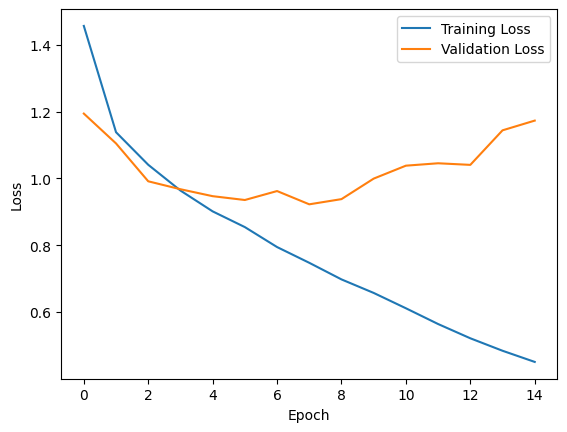

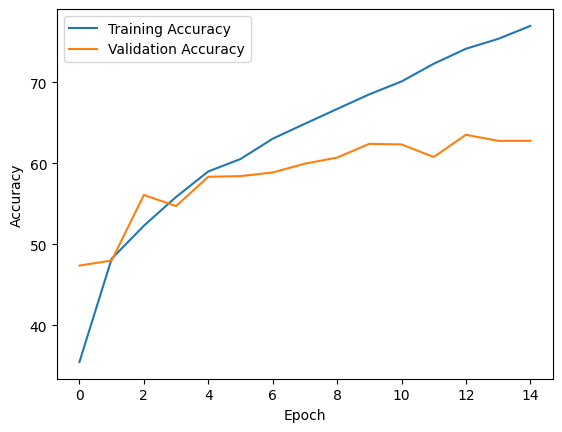

Evaluating best model on test set...


Testing: 100%|██████████| 75/75 [00:01<00:00, 38.17it/s]


Test Accuracy: 0.6270
Test Precision: 0.6441
Test Recall: 0.6270
Test F1-score: 0.6255

              precision    recall  f1-score   support

       Anger       0.68      0.68      0.68       916
       Bored       0.67      0.80      0.73      1098
     Disgust       0.38      0.67      0.48       291
        Fear       0.36      0.63      0.46       308
       Happy       0.72      0.47      0.57      1914
     Neutral       0.62      0.52      0.56      2226
    Question       0.71      0.79      0.75      1139
         Sad       0.60      0.67      0.63       857
    Surprise       0.63      0.72      0.67       728

    accuracy                           0.63      9477
   macro avg       0.59      0.66      0.61      9477
weighted avg       0.64      0.63      0.63      9477



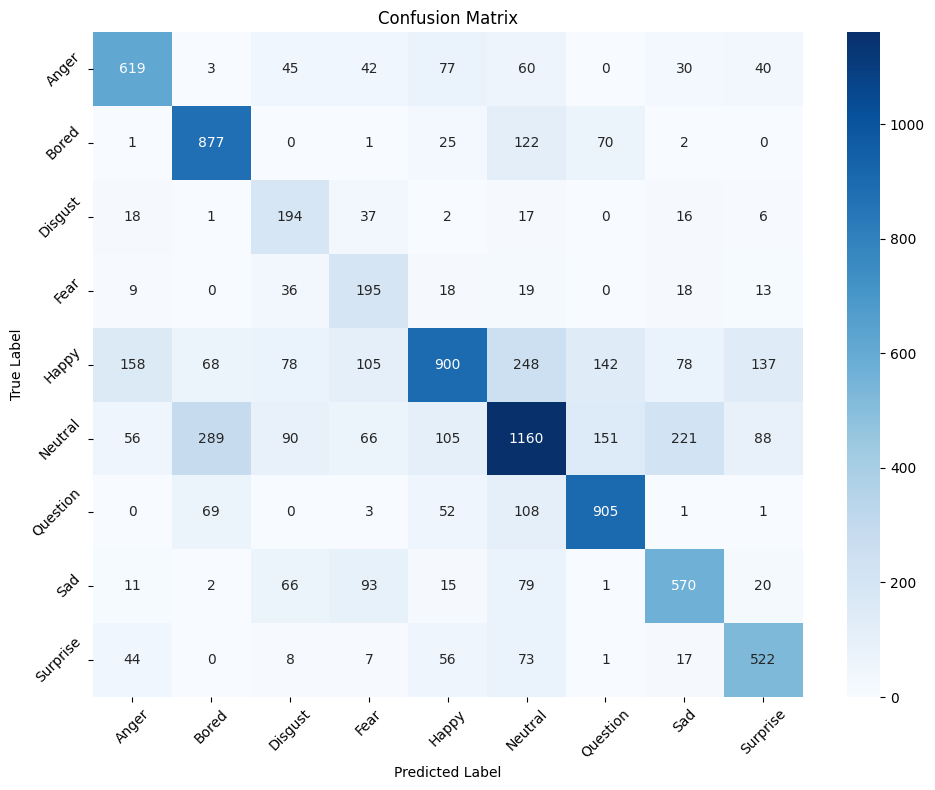

In [11]:
Pipeline.execute(
    model=model,
    labelmap=trainset.label_map,
    trainloader=trainloader,
    valloader=valloader,
    testloader=testloader,
    criterion=criterion,
    optimizer=optimizer,
    device=device,
    num_epochs=num_epochs,
    model_name=model_name,
    patience=7
)